<a href="https://colab.research.google.com/github/skasana/Digit-Recognizer/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [ ]:
labeled_images = pd.read_csv('/content/train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

Text(0.5, 1.0, '4')

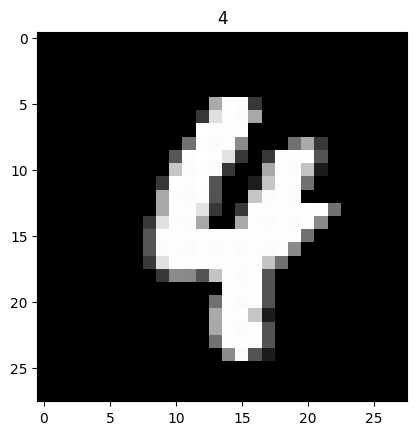

In [ ]:
i=1
img=np.array(train_images.iloc[i])
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([625.,   4.,  12.,  13.,   8.,   6.,  10.,   7.,   5.,  94.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

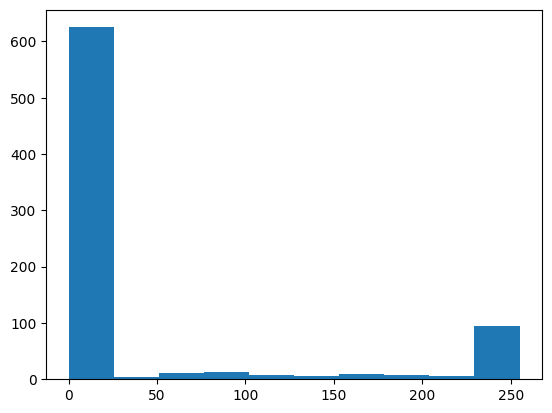

In [ ]:
plt.hist(train_images.iloc[i])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
imputer = SimpleImputer(strategy='mean')
train_images = imputer.fit_transform(train_images)
test_images = imputer.transform(test_images)
clf = SVC()
clf.fit(train_images, train_labels.values.ravel())

accuracy = clf.score(test_images, test_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9352428393524284


<ipython-input-14-ec1487eefe71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  images[images > 0] = 1
<ipython-input-14-ec1487eefe71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  images[images > 0] = 1


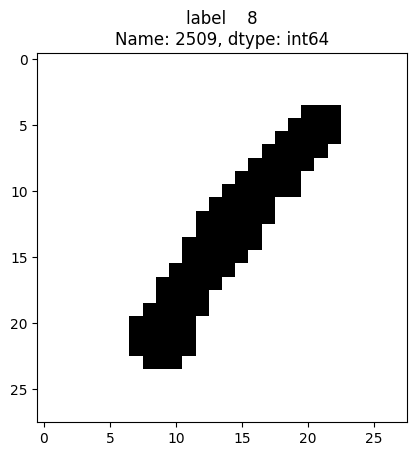

In [ ]:
train_images = pd.read_csv('/content/train.csv')
test_images[test_images>0]=1
images = train_images.iloc[:, 1:]

images[images > 0] = 1
i = 0
img = np.array(images.iloc[i]).reshape((28, 28))

plt.imshow(img,cmap='binary')
plt.title(str(train_labels.iloc[i]))
plt.show()

(array([687.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  98.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

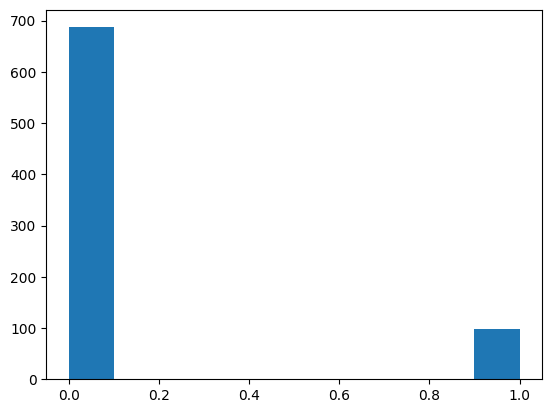

In [ ]:
plt.hist(train_images.iloc[i])

In [ ]:
train_labels = train_images.iloc[:, 0]
train_images = train_images.iloc[:, 1:]

train_images[train_images > 0] = 1

clf = svm.SVC()
clf.fit(train_images, train_labels)

accuracy = clf.score(test_images, test_labels)
print("Accuracy:", accuracy)

<ipython-input-18-c1869a4dcbfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_images[train_images > 0] = 1
<ipython-input-18-c1869a4dcbfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_images[train_images > 0] = 1
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9887920298879203


In [ ]:
test_data=pd.read_csv('/content/test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data)

In [ ]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)

In [ ]:
from google.colab import files
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>